In [30]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [31]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

%matplotlib inline

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [47]:
def longHold(series):
    return series['Close'].iloc[-1] - series['Close'].iloc[0]

def shortHold(series):
    return -1 * longHold(series)

def hold(series):
    return 0

def fitRangeWithinWindow(idx, lastI):
    out = np.array([-1,0,1]) + idx
    out = np.where(out > lastI, out, lastI)
    out = np.where(out < 0, out, 0)
    return np.unique(out)

efficiency = 0.5

def longGreedy(series):
    maxI = series['High'].values.argmax()
    minI = series['Low'].values.argmin()
    
    lastI = series.shape[0] - 1
    
    # maxIdx = fitRangeWithinWindow(maxI, lastI)
    # minIdx = fitRangeWithinWindow(minI, lastI)
    maxIdx = np.array([maxI])
    minIdx = np.array([minI])
    
    buyPrice = (series['Low'].iloc[minI] - series['Close'].iloc[0]) * efficiency + series['Close'].iloc[0] #(series['High'].iloc[minIdx].values.max() + series['Low'].iloc[minIdx].min()) / 2
    
    sellPrice = series['Close'].iloc[-1]
    if minI < maxI:
        sellPrice = max(sellPrice, (series['High'].iloc[maxI] - buyPrice) * efficiency + buyPrice) #(series['High'].iloc[maxIdx].values.max() + series['Low'].iloc[maxIdx].min()) / 2 
    # else:
    #     # wait for low nonetheless, sell at end
    #     sellPrice = series['Close'].iloc[-1]
        
    return sellPrice - buyPrice
    
def shortGreedy(series):
    maxI = series['High'].values.argmax()
    minI = series['Low'].values.argmin()
    
    lastI = series.shape[0] - 1
    
    # maxIdx = fitRangeWithinWindow(maxI, lastI)
    # minIdx = fitRangeWithinWindow(minI, lastI)
    maxIdx = np.array([maxI])
    minIdx = np.array([minI])
    
    sellPrice = (series['High'].iloc[maxI] - series['Close'].iloc[0]) * efficiency + series['Close'].iloc[0] # (series['High'].iloc[maxIdx].values.max() + series['Low'].iloc[maxIdx].min()) / 2
    
    buyPrice = series['Close'].iloc[-1]
    
    if minI > maxI:
        buyPrice = min(buyPrice, sellPrice - efficiency * (sellPrice - series['Low'].iloc[minI])) #(series['High'].iloc[minIdx].values.max() + series['Low'].iloc[minIdx].min()) / 2
    # else:
    #     # short at high nonetheless, buy back at end
    #     buyPrice = series['Close'].iloc[-1]
        
    return sellPrice - buyPrice
        

AMZN policies computed


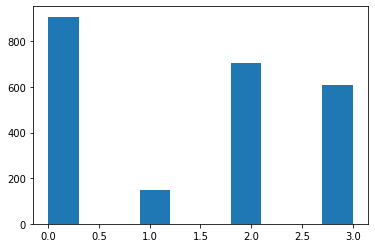

TSLA policies computed


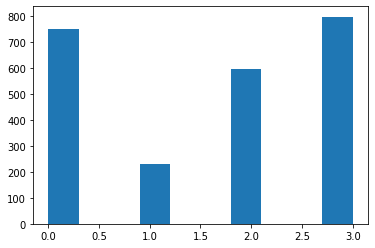

BABA policies computed


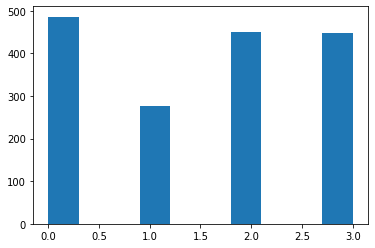

HD policies computed


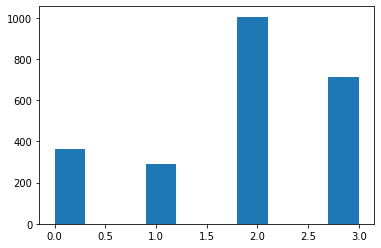

TM policies computed


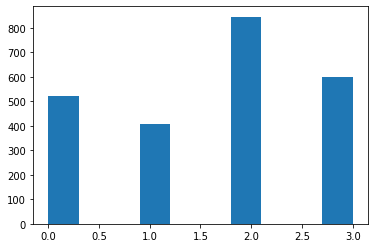

NKE policies computed


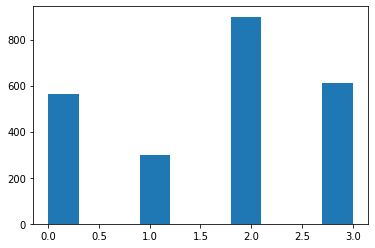

MCD policies computed


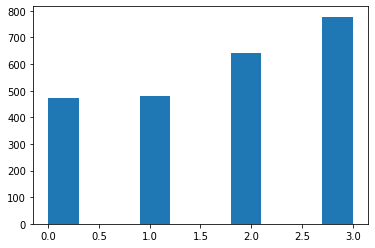

LOW policies computed


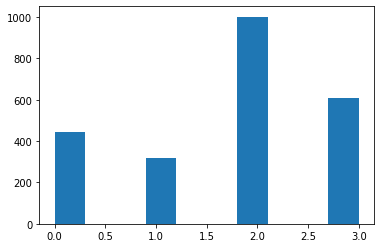

SBUX policies computed


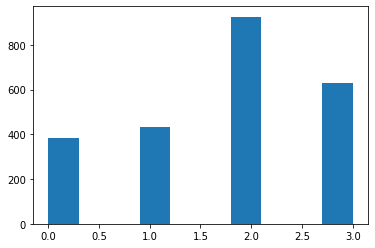

JD policies computed


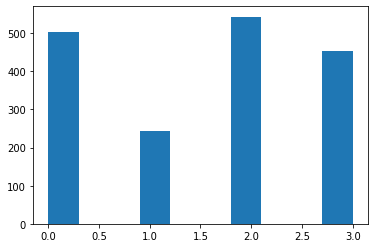

PDD policies computed


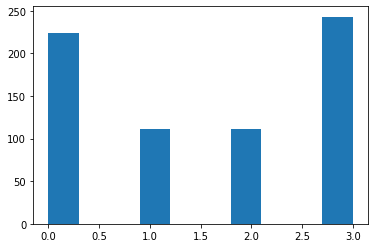

BKNG policies computed


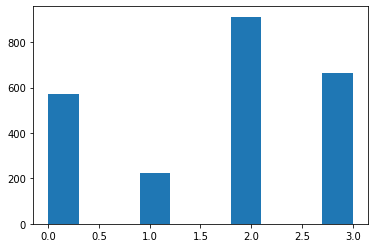

GM policies computed


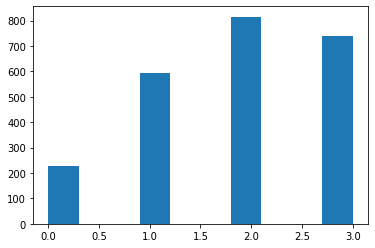

MELI policies computed


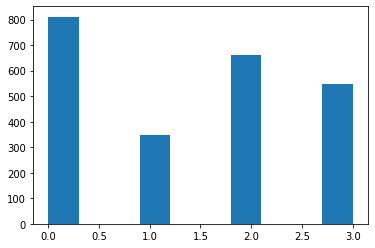

TJX policies computed


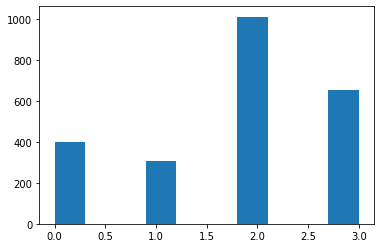

NIO policies computed


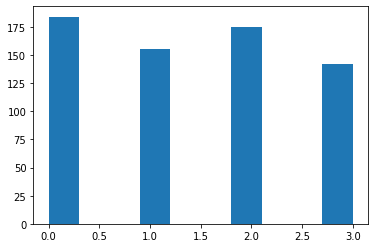

F policies computed


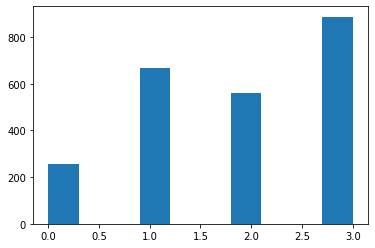

LULU policies computed


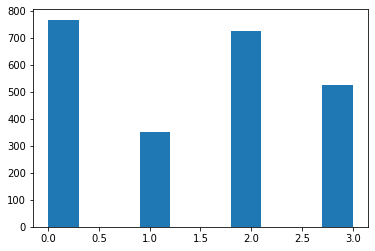

HMC policies computed


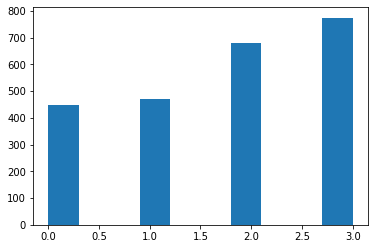

CMG policies computed


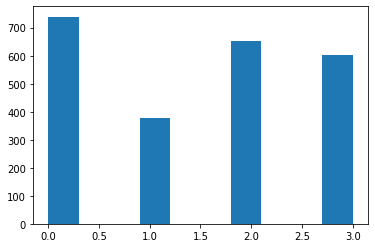

In [51]:
WINDOW_SIZE = 45

if not os.path.exists("data_with_labels"):
        os.mkdir("data_with_labels")

for ticker in tickers:
    data = pd.read_csv(f'./data/{ticker}.csv')
    optimalPolicies = []
    for i in range(data.shape[0] - WINDOW_SIZE):
        window = data[i:i+WINDOW_SIZE]
        candidates = np.array([longHold(window), shortHold(window), longGreedy(window), shortGreedy(window)])
        optimalPolicies.append(np.argmax(candidates))
    data['policy'] = pd.Series(optimalPolicies)
    for col in ['High', 'Open', "Low", "Close", "Volume"]:
        data.drop(col, axis=1, inplace=True)
    data.dropna(inplace=True)
    data.to_csv(f'./data_with_labels/{ticker}_with_labels.csv') #write to csv file
    print(f"{ticker} policies computed")
    
    plt.hist(data['policy'])
    plt.show()
    
    
    